# Pricing Practice 1
Weiyang Liu

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML

from bs_pricing.params import Params
from bs_pricing.options import EuVanilla, Digital, Spread
from bs_pricing.surface import Surface

In [2]:
params = Params(
    volatility = 0.4,
    rate = 0,
    dividend = -0.05
)

N = 100

strike = 1

spot_lb = 0.3
spot_ub = 2.5
T_lb = 0.1
T_ub = 2

spot_list = np.array([0.5, 1, 1.5])
T_list = np.array([0.5, 1, 2])

spot_range = np.linspace(spot_lb * strike, spot_ub * strike, N)
T_range = np.linspace(T_lb, T_ub, N)

options = [
    EuVanilla(spot=None, T=None, strike=strike, params=params, is_call=True),
    EuVanilla(spot=None, T=None, strike=strike, params=params, is_call=False),
    Digital(spot=None, T=None, strike=strike, params=params, is_call=True),
    Digital(spot=None, T=None, strike=strike, params=params, is_call=False),
    Spread(spot=None, T=None, K_lo=strike, K_hi=1.15*strike, params=params, is_call=True),
    Spread(spot=None, T=None, K_lo=0.8*strike, K_hi=strike, params=params, is_call=False)
]

tasks = ['price', 'delta', 'gamma', 'vega']

In [3]:
# array of output dataframes
arr_df = []

for i in range(len(options)):
    surface = Surface(spot_list, T_list, options[i])
    surface.generate()
    arr_df.append([])

    for j in range(len(tasks)):
        arr_df[i].append(surface.table(tasks[j]))

print('In each table, the header is spot price and the index is time to maturity.')

# Create an HTML table that contains the dataframes
table = '<table>'

# header row
table += '<tr>'
table += '<th style="font-weight: bold">Option Name</th>'
for j in range(len(tasks)):
    table += f'<th style="font-weight: bold">{tasks[j]}</th>'
table += '</tr>'

# output dataframes in rows
for i in range(len(options)):
    table += '<tr>'

    table += f'<td>{options[i].name}</td>'

    for j in range(len(tasks)):
        table += f'<td>{arr_df[i][j]._repr_html_()}</td>'
    
    table += '</tr>'

# end table
table += '</table>'

# Display the HTML table
display(HTML(table))

In each table, the header is spot price and the index is time to maturity.


C:\Users\liuweiyang\AppData\Local\Temp\ipykernel_3680\3512676667.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


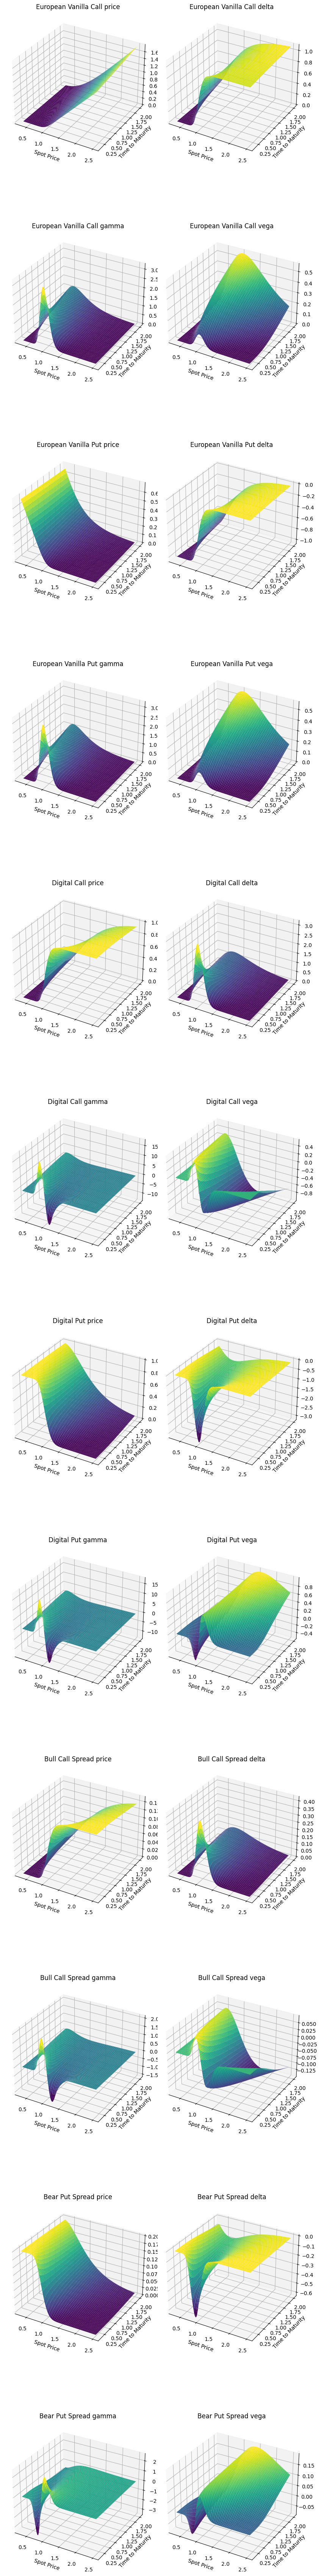

In [4]:
fig, axs = plt.subplots(nrows=12, ncols=2, figsize=(8.27, 11.69 * 6),
                        layout='constrained',
                        subplot_kw={"projection": "3d"})

plot_id = 0
plot_row = 0
plot_col = 0

for option in options:
    surface = Surface(spot_range, T_range, option)
    surface.generate()

    for task in tasks:
        surface.plot(axs[plot_row][plot_col], task)
        
        plot_id += 1
        plot_row, plot_col = divmod(plot_id, 2)

plt.show()
plt.close(fig)